In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def laduj_tylko_punkty(sciezka):
    df = pd.read_csv(sciezka)
    oceny = [col for col in df.columns if col.startswith("k_")]
    return df.loc[:, oceny]

In [3]:
df = laduj_tylko_punkty("../dane/wyniki/j._polski_podstawowa_2014.csv")

/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
df.count()

k_7475    307656
k_7476    307656
k_7477    307656
k_7478    307656
k_7479    307656
k_7480    307656
k_7481    307656
k_7482    307656
k_7483    307656
k_7484    307656
k_7485    307656
k_7486    307656
k_7487    307656
k_7497    117108
k_7495    117108
k_7496    117108
k_7494    117108
k_7499    117108
k_7498    117108
k_7491    189177
k_7489    189177
k_7490    189177
k_7488    189177
k_7493    189177
k_7492    189177
k_7503      1371
k_7501      1371
k_7502      1371
k_7500      1371
k_7505      1371
k_7504      1371
dtype: int64

In [5]:
df.count().value_counts()

307656    13
1371       6
189177     6
117108     6
dtype: int64

In [6]:
df.max()

k_7475     1.0
k_7476     1.0
k_7477     2.0
k_7478     2.0
k_7479     2.0
k_7480     1.0
k_7481     2.0
k_7482     2.0
k_7483     1.0
k_7484     2.0
k_7485     1.0
k_7486     1.0
k_7487     2.0
k_7497    12.0
k_7495     5.0
k_7496     5.0
k_7494    25.0
k_7499     4.0
k_7498     3.0
k_7491    12.0
k_7489     5.0
k_7490     5.0
k_7488    25.0
k_7493     4.0
k_7492     3.0
k_7503    12.0
k_7501     5.0
k_7502     5.0
k_7500    25.0
k_7505     4.0
k_7504     3.0
dtype: float64

In [7]:
sumy = df.sum(axis=1).astype(int)

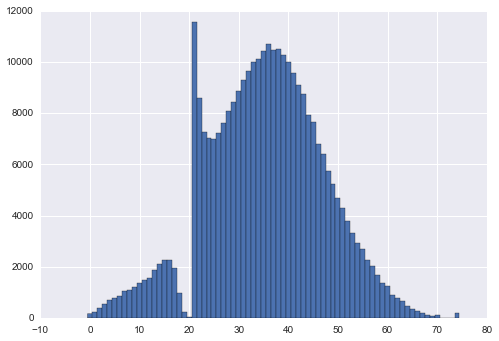

In [8]:
sumy.hist(bins=(sumy.max() + 1), range=(-0.5, sumy.max() + 0.5))

In [9]:
kor = df.corr()

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


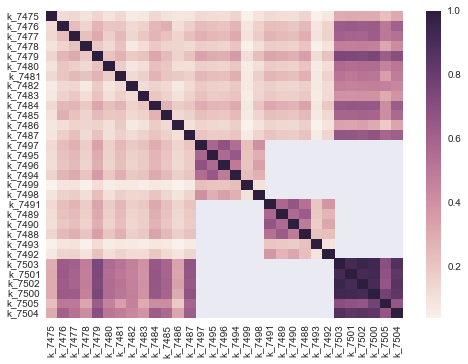

In [10]:
sns.heatmap(kor)

In [17]:
kor_wariant = df[pd.notnull(df["k_7491"])].loc[:, df.columns[df.count() > 180000]].corr()

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


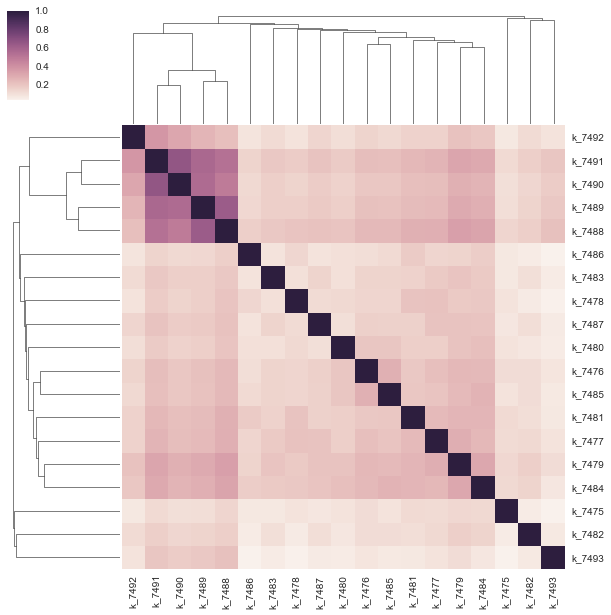

In [19]:
sns.clustermap(kor_wariant)

In [23]:
df_m = laduj_tylko_punkty("../dane/wyniki/matematyka_podstawowa_2014.csv")

/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


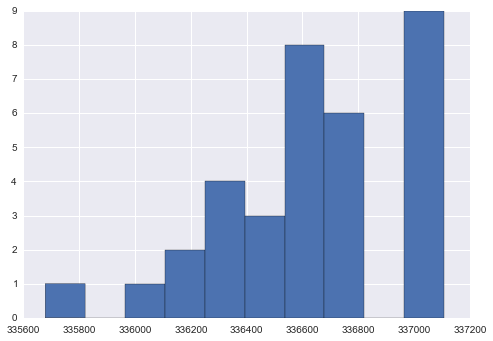

In [24]:
df_m.count().hist()

In [25]:
kor_m = df_m.corr()

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


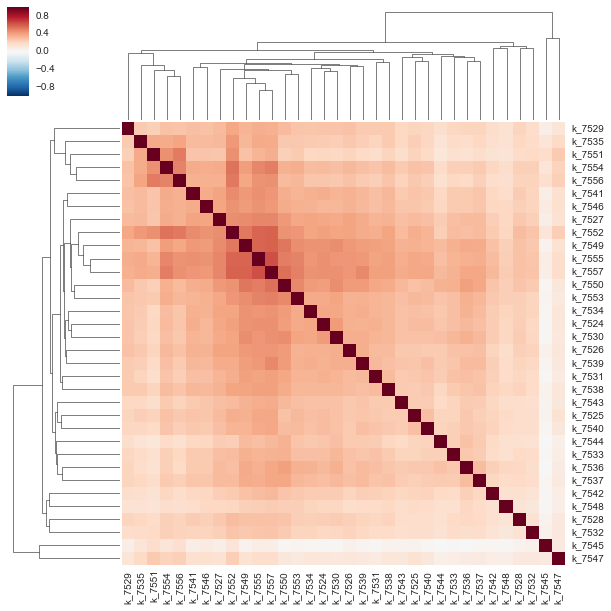

In [26]:
sns.clustermap(kor_m)

In [ ]:
# znow pl

In [36]:
df_p_w2 = df[pd.notnull(df["k_7491"])].loc[:, df.columns[df.count() > 180000]]

In [50]:
covsum = df_p_w2.cov().sum().sum()
print(covsum)

137.156731976


In [49]:
srednia_p_w2 = df_p_w2.sum(axis=1).mean()
print(srednia_p_w2)

35.4553989121


In [46]:
from scipy import stats
import numpy as np

In [55]:
stats.norm?

In [45]:
np.exp()

In [56]:
X = np.linspace(0, sumy_p_w2.max(), 100)
Y = np.exp( - (X - srednia_p_w2)**2 / (2 * covsum)) / np.sqrt(2 * np.pi * covsum)

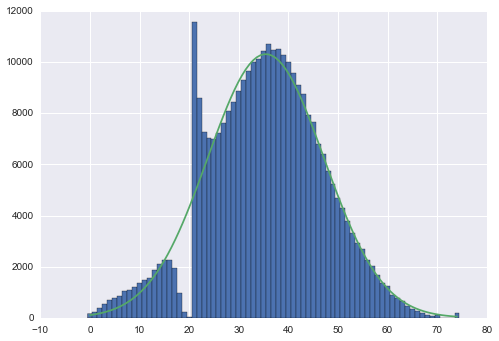

In [72]:
sumy_p_w2 = df_p_w2.sum(axis=1).astype(int)
sumy.hist(bins=(sumy_p_w2.max() + 1), range=(-0.5, sumy_p_w2.max() + 0.5))
plt.plot(X, Y * len(df_p_w2) * 1.6)

In [58]:
len(df_p_w2)

189177

In [70]:
df_p_w2.sum(axis=1).value_counts().sum()

189177

In [60]:
np.pi

3.141592653589793

In [64]:
z = 0
for i in range(80):
    z += np.exp( - (i - srednia_p_w2)**2 / (2 * covsum)) / np.sqrt(2 * np.pi * covsum)

In [65]:
z

0.99884918939458212